# Name:ANSHUMAN AGARWAL

# GRIPAPRIL23 - The Spark Foundation

# Data Science & Business Analytics Internship

# Task 1 : Prediction using Supervised Machine Learning

->The problem statement is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hours/day.

This is a simple linear regression task as it involves just two variables.

In [12]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Read data from the given url
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
data.shape

(25, 2)

Rows : 25
Columns : 2

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We found that there are no null values.

In [17]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2 : Exploratory Data Analysis

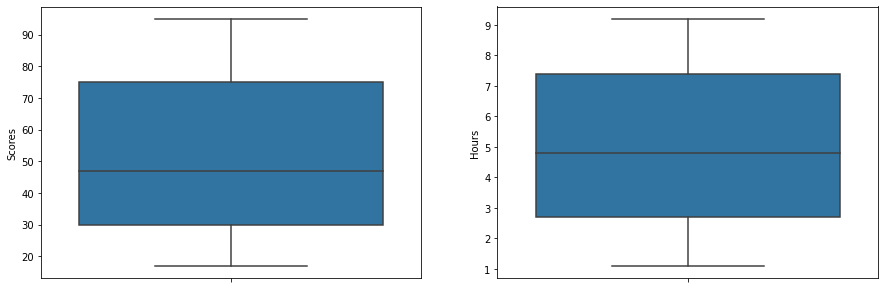

In [18]:
# To check for Outliers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=data.Scores)

plt.subplot(1,2,2)
sns.boxplot(y=data.Hours)

plt.show()

No Outlier found to be treated henceforth.

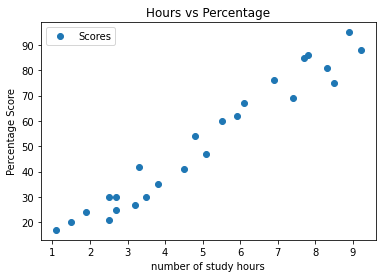

In [19]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can see that there is a positive linear relation between the number of study hours and Percentage Score

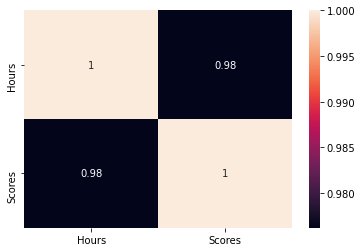

In [20]:
# To check for Correlation
sns.heatmap(data.corr(),annot=True)
plt.show()

Hours and Scores are highly Positively correlated to each other with 0.98/1

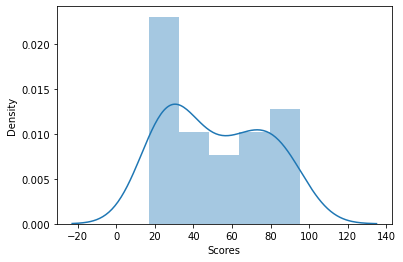

In [21]:
# To check for distribution of Scores in the dataset

sns.distplot(data['Scores'], bins=5)
plt.show()

So the range of Scores is distributed between 18-93 and maximum distribution of Scores is between 20-30.

# Step 3: Performing Simple Linear Regression

First assign the feature variable, Hours to the variable x and the response variable, Score, to the variable y.

In [32]:
x = data[['Hours']] 
y = data[['Scores']]

Train-Test Split

To split our variable into training and testing sets.
Will perform this by importing train_test_split from the sklearn.model_selection library.
It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [34]:
x_train.shape

(20, 1)

In [35]:
x_test.shape

(5, 1)

After splitting the data into training and testing sets,finally it's the time to train our algorithm.

# Step 4 : Training Linear Regression Model

In [67]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train)

LinearRegression()

Training completed.

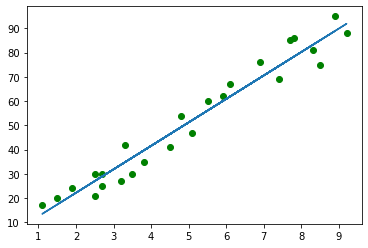

In [68]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y, c= 'g')
plt.plot(x, line);
plt.show()

In [69]:
y_pred=lr.predict(x_test)

In [70]:
y_test.head()

,Scores
8,81
16,30
0,21
23,76
11,62


In [71]:
y_pred[0:5]

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

So here is our actual and predicted scores.

Checking Accuracy Scores for both training as well as testing sets

In [72]:
print("Training Score:",lr.score(x_train,y_train)*100)
print("Testing Score:",lr.score(x_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


# What will be predicted score if a student study for 9.25 hrs in a day?

In [79]:
# we can also test with our own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = [92.38611528]


# Final Step 6: Evaluating the model

In [77]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


That means that the model doing great linear model as less MAE 

# Conclusion

After Analysing the dataset we got Predicted score around 92.38 based on the number of study hours i.e., 9.25 hrs/day.

# ------------------------------------------The End------------------------------------------